## <font color='red'> **introduction** </font>
 ## The goal of this project is to use accelerometer sensor data to predict the posture of a person, while highlighting the importance of fall prediction for the elderly. Falls are a leading cause of injury among older adults, with one in four Americans aged 65 and older experiencing a fall each year. Falls can lead to serious injuries such as hip fractures and head trauma, and can have a significant impact on the quality of life and independence of older adults. By predicting posture and potentially identifying risky movements or behaviors, this machine learning project can contribute to fall prevention efforts and improve the safety and well-being of older adults. and compar a differant model like knn , decision tree ect.. 
 
 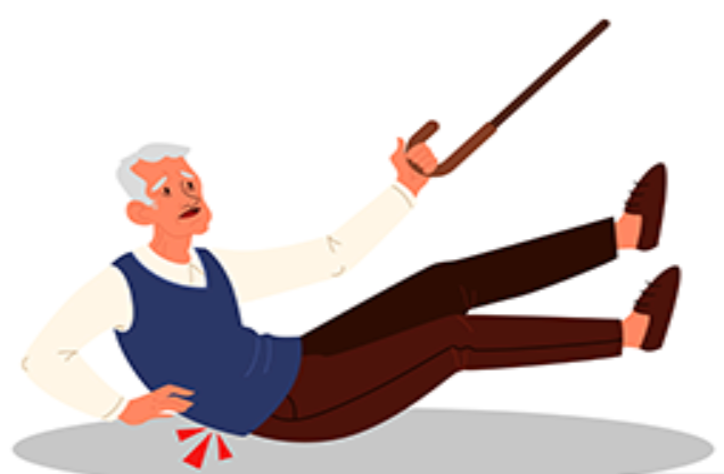

## <font color = 'bleu'> Decision trees are a popular machine learning technique used for both classification and regression tasks. They are a type of predictive model that uses a tree-like structure to represent a sequence of decisions and their possible consequences.

## The decision tree is built by recursively splitting the data into smaller subsets based on the values of one or more input features, with the goal of maximizing the information gain at each split. Information gain is a measure of the reduction in uncertainty achieved by splitting the data based on a particular feature, and it is used to determine the best feature to split on at each level of the tree.
## Once the decision tree is constructed, it can be used to make predictions for new data points by traversing the tree from the root node down to a leaf node, where each internal node represents a decision based on the value of a particular feature, and each leaf node represents a prediction for the output variable.

## Decision trees are popular in machine learning due to their interpretability, flexibility, and ease of use. They can handle both numerical and categorical data, and can be used for both binary and multi-class classification tasks, as well as regression tasks.

## However, decision trees can suffer from overfitting, where the model becomes too complex and captures noise in the data, leading to poor generalization performance on new data. This can be mitigated through techniques such as pruning, ensemble methods, and using regularization. </font>

## <font color='bleu'> **importing packages you will need later** </font>


In [111]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import *
from sklearn.preprocessing import *
from sklearn.cluster import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()


## <font color='bleu'> **load data that I collected from my axelometer** </font>
 

In [112]:
df = pd.read_csv("demo5.csv")


## <font color='bleu'> **visualisation of my np** </font>


In [113]:
df.head()

,Unnamed: 0,x,y,z,omega,katsse,akev,possture
0,0,1164,-413,268,3.191775,0,0,sits down
1,1,1198,-505,260,44.077060,0,0,walk
2,2,1171,-424,287,11.115318,0,0,sits down
3,3,1169,-417,295,0.947223,0,0,sits down
4,4,1171,-418,295,0.330010,0,0,sits down


In [114]:
df.describe()

,Unnamed: 0,x,y,z,omega,katsse,akev
count,526.00000,526.000000,526.000000,526.000000,526.000000,526.0,526.0
mean,262.50000,700.762357,-899.190114,389.515209,5.450536,0.0,0.0
std,151.98739,512.340882,515.073134,152.731095,8.064815,0.0,0.0
min,0.00000,-74.000000,-1696.000000,175.000000,0.000000,0.0,0.0
25%,131.25000,103.250000,-1471.000000,248.000000,0.000000,0.0,0.0
50%,262.50000,1148.000000,-452.000000,295.000000,1.000062,0.0,0.0
75%,393.75000,1159.000000,-424.000000,540.000000,8.954606,0.0,0.0
max,525.00000,1198.000000,-369.000000,755.000000,45.611741,0.0,0.0


## <font color='bleu'> **supresion of colone that i dont need katsse , akev** </font>

 

In [115]:
df.drop(['Unnamed: 0', 'katsse', 'akev'], axis=1, inplace=True)

In [116]:
df.head(10)

,x,y,z,omega,possture
0,1164,-413,268,3.191775,sits down
1,1198,-505,260,44.077060,walk
2,1171,-424,287,11.115318,sits down
3,1169,-417,295,0.947223,sits down
4,1171,-418,295,0.330010,sits down
5,1167,-416,295,0.415458,sits down
6,1169,-418,295,0.000000,sits down
7,1169,-418,295,0.000000,sits down
8,1167,-416,295,0.000000,sits down
9,1166,-417,295,0.775602,sits down


## <font color='bleu'> **replace the target name in a numbur for train my model** </font>



In [117]:
df['possture'].replace(['walk','sits down','from walk to sit','none'],[0,1,2,3],inplace=True)

## <font color='bleu'> **chiose the feature to be X and target to be y** </font>


In [118]:
X = df.drop("possture", axis=1)
y = df["possture"]

## <font color='bleu'> **choice 20% for testing and 80% for training** </font>


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color='bleu'> **we will opt for the decision tree model** </font>
 

In [120]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [121]:
y_pred = clf.predict(X_test)

## <font color='bleu'> **like you can see the prediction model = 98.1%** </font>

 

In [122]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9716981132075472


## <font color='bleu'> **plot the decision tree** </font>


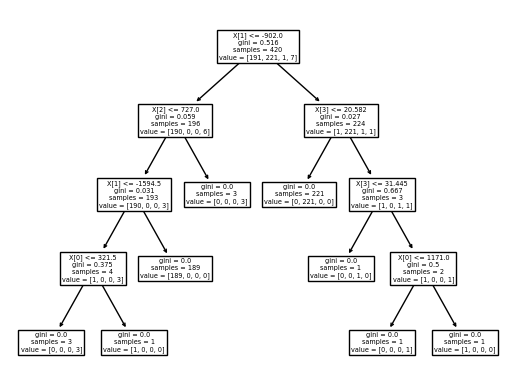

In [123]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots()
plot_tree(clf, ax=ax)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

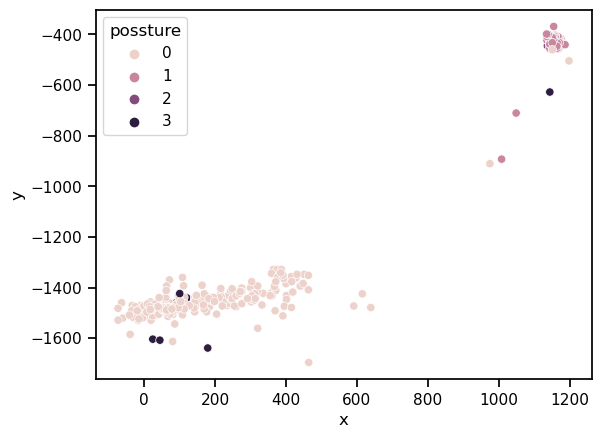

In [124]:
# plot an Understandable with seaborn
import seaborn as sns
sns.scatterplot(x='x',y='y',hue='possture',data=df)
plt.show

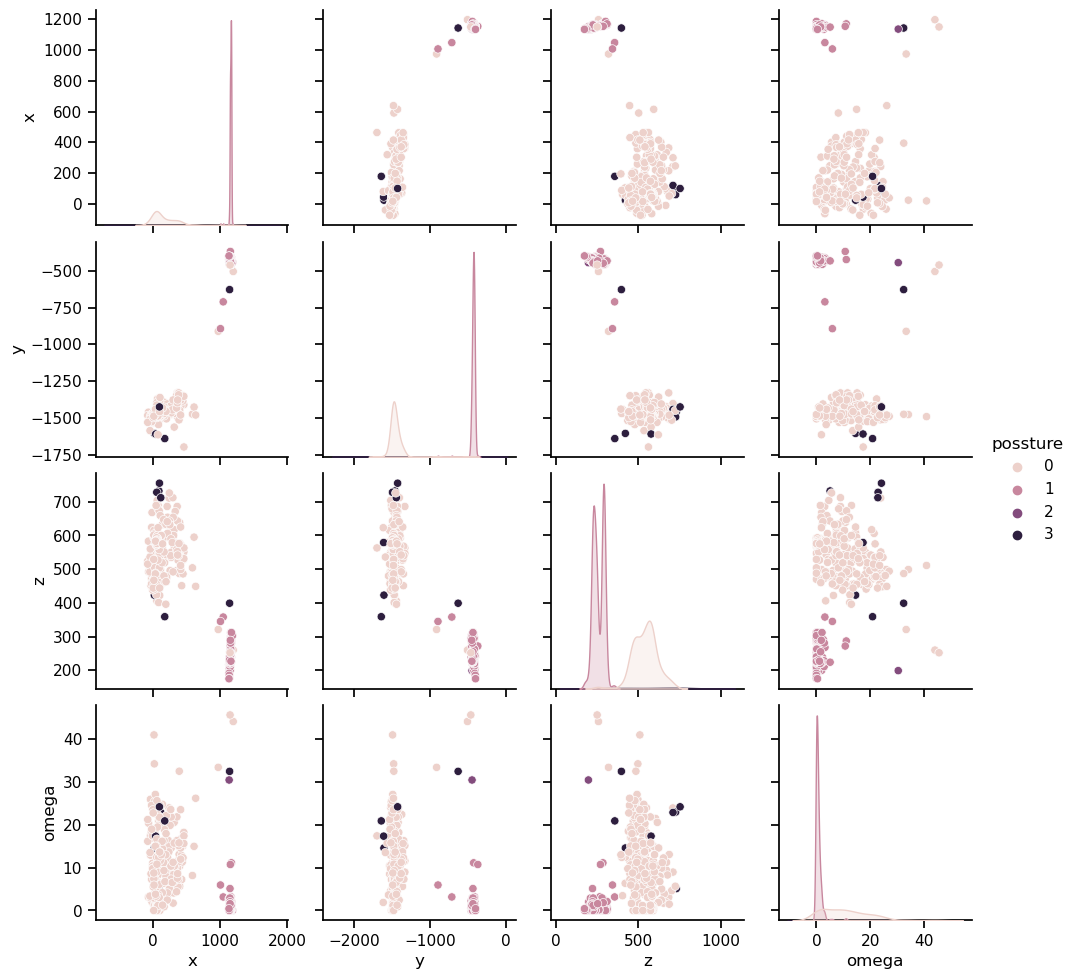

In [125]:
#here you can see a lot of graph for any categorie  
sns.pairplot(df,hue='possture')
plt.show()

In [126]:
#scale the data before pairplot
float_columns = [x for x in df.columns if x in ['x','y','omega','possture']]

sc = StandardScaler()
df[float_columns] = sc.fit_transform(df[float_columns])
df.head(4)

,x,y,z,omega,possture
0,0.905020,0.944823,268,-0.280343,0.710224
1,0.971445,0.766038,260,4.794071,-1.011333
2,0.918696,0.923446,287,0.703076,0.710224
3,0.914788,0.937050,295,-0.558922,0.710224


In [127]:
'''float_columns = [x for x in df.columns if x in ['x','y','omega','possture']]
sns.set_context('notebook')
sns.pairplot(df[float_columns + ['possture']], 
             hue='walk', 
             hue_order=[0,1],
             height=3,
             palette={0:'deepskyblue',1:'crimson'});'''

"float_columns = [x for x in df.columns if x in ['x','y','omega','possture']]\nsns.set_context('notebook')\nsns.pairplot(df[float_columns + ['possture']], \n             hue='walk', \n             hue_order=[0,1],\n             height=3,\n             palette={0:'deepskyblue',1:'crimson'});"

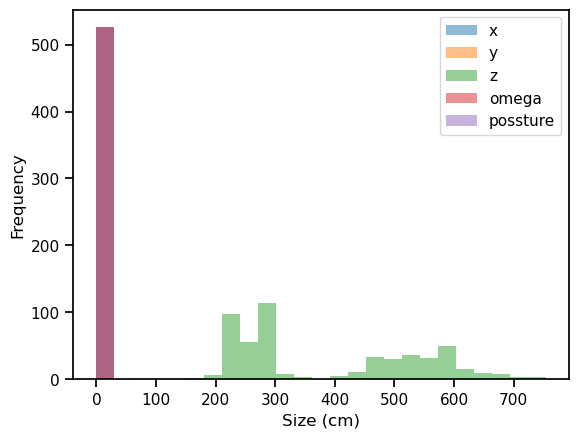

In [128]:
import seaborn as sns

sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = df.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

In [129]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(y == y_pred) / float(real.shape[0])

In [130]:
#print(accuracy(y, y_pred))

In [131]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## <font color='bleu'> **now i include a new value of data and we will see where the model will classify** </font>
 

In [132]:
X_new = np.array([[1136,-445, 199,30]])

In [133]:

prediction = clf.predict(X_new) 
print("Prediction: {}".format(prediction)) 
print("Predicted target name: {}".format(
df['possture'][prediction]))

Prediction: [2]
Predicted target name: 2    0.710224
Name: possture, dtype: float64


/Users/mendelsellam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [134]:
# Plot a confusion matrix to visualize the performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[41  0  2]
 [ 0 62  0]
 [ 1  0  0]]


## <font color='green'> **we go chek with a different approach (knn)** </font>

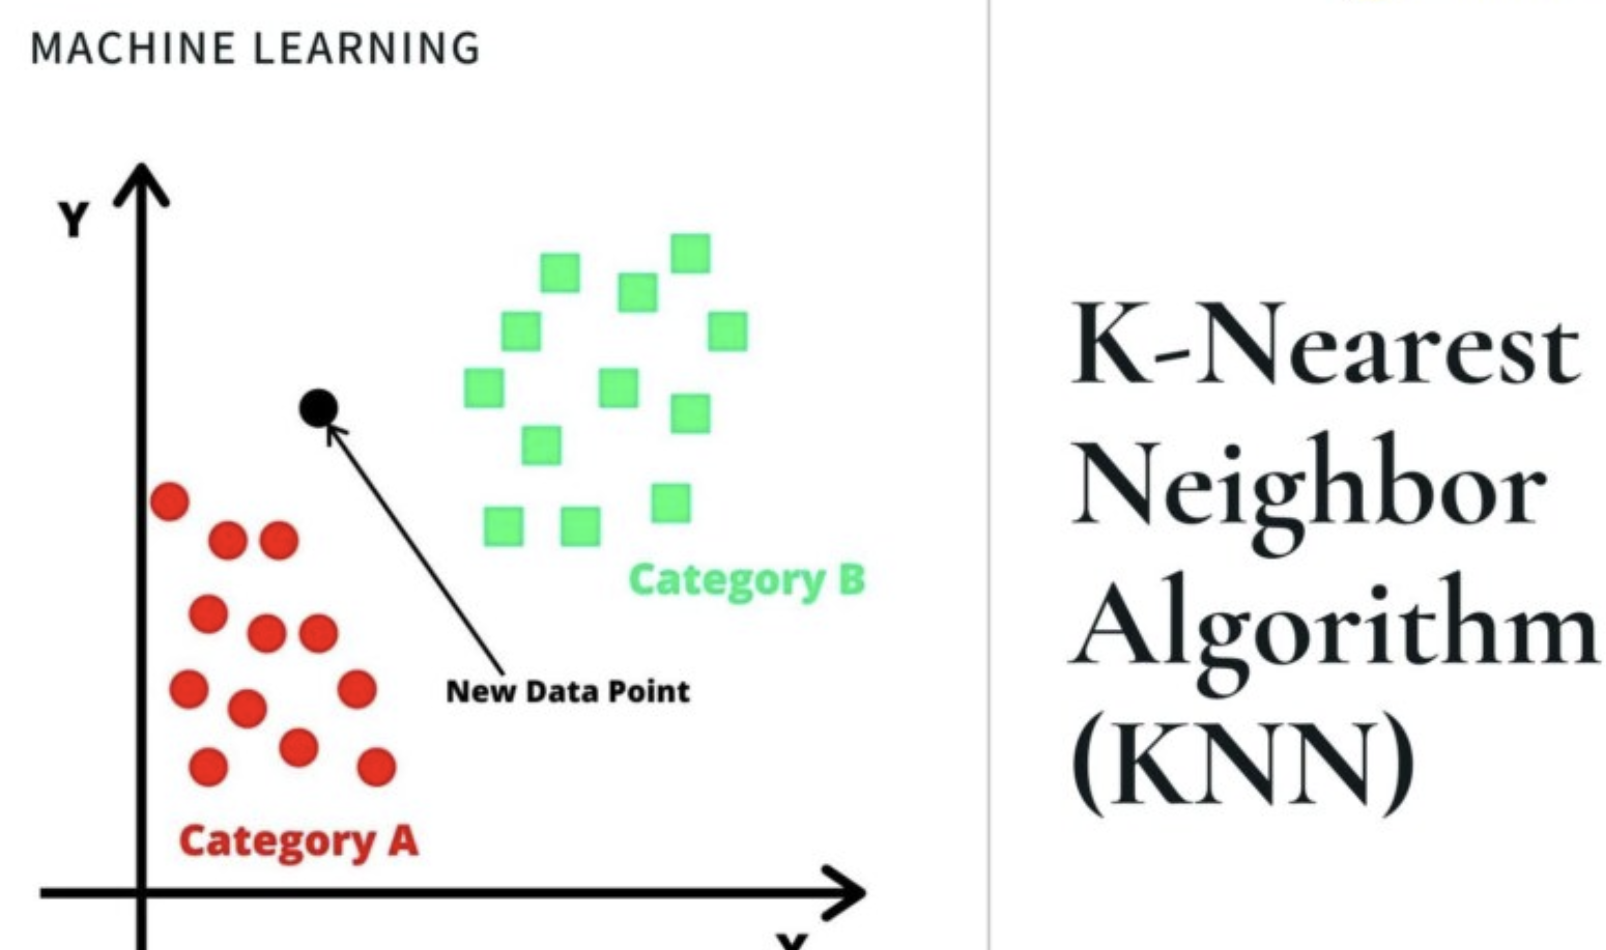


## <font color = 'green'> **Load the accelerometer data into a pandas DataFrame** </font>

In [135]:
df = pd.read_csv("demo5.csv")

## <font color = 'green'> **Extract the input features (accelerometer data) and target (posture)** </font>

In [136]:
X = df.drop("possture", axis=1).values
y = df["possture"].values

## <font color = 'green'> **Split the data into training and testing sets** </font>

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color = 'green'> **Train a KNN classifier** </font>

In [138]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

## <font color = 'green'> **Make predictions on the test set** </font>

In [139]:
y_pred = clf.predict(X_test)

/Users/mendelsellam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## <font color = 'green' > **Evaluate the model's performance** </font>

In [140]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.11%


## <font color = 'green'> **Plot a confusion matrix to visualize the performance** </font>

In [141]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 0  0  1]
 [ 0 62  0]
 [ 0  1 42]]


## <font color='purple'> **we go chek with a different approach (linear regression)** </font>


## <font color = 'purple'> Linear regression is a statistical modeling technique used to predict the relationship between a continuous dependent variable (or output variable) and one or more continuous independent variables (or input variables). In other words, it allows modeling the relationship between an output variable Y and one or more input variables X, assuming that this relationship is linear.

## The linear regression model is defined by the following equation:

## Y = b0 + b1X1 + b2X2 + ... + bn*Xn 

## where Y is the output variable, b0 is the intercept, b1 to bn are the regression coefficients for each input variable X1 to Xn, and X1 to Xn are the input variables.

## The goal of linear regression is to find the values of the regression coefficients b0 to bn that minimize the model's prediction error. This error is typically measured using the method of least squares, which calculates the sum of the squares of the differences between the values predicted by the model and the actual values.

## Once the linear regression model is fitted to the training data, it can be used to predict the values of the output variable for new input values.

## Linear regression is used in many areas of machine learning, including data analysis, trend prediction, economic and financial modeling, and many others </font>

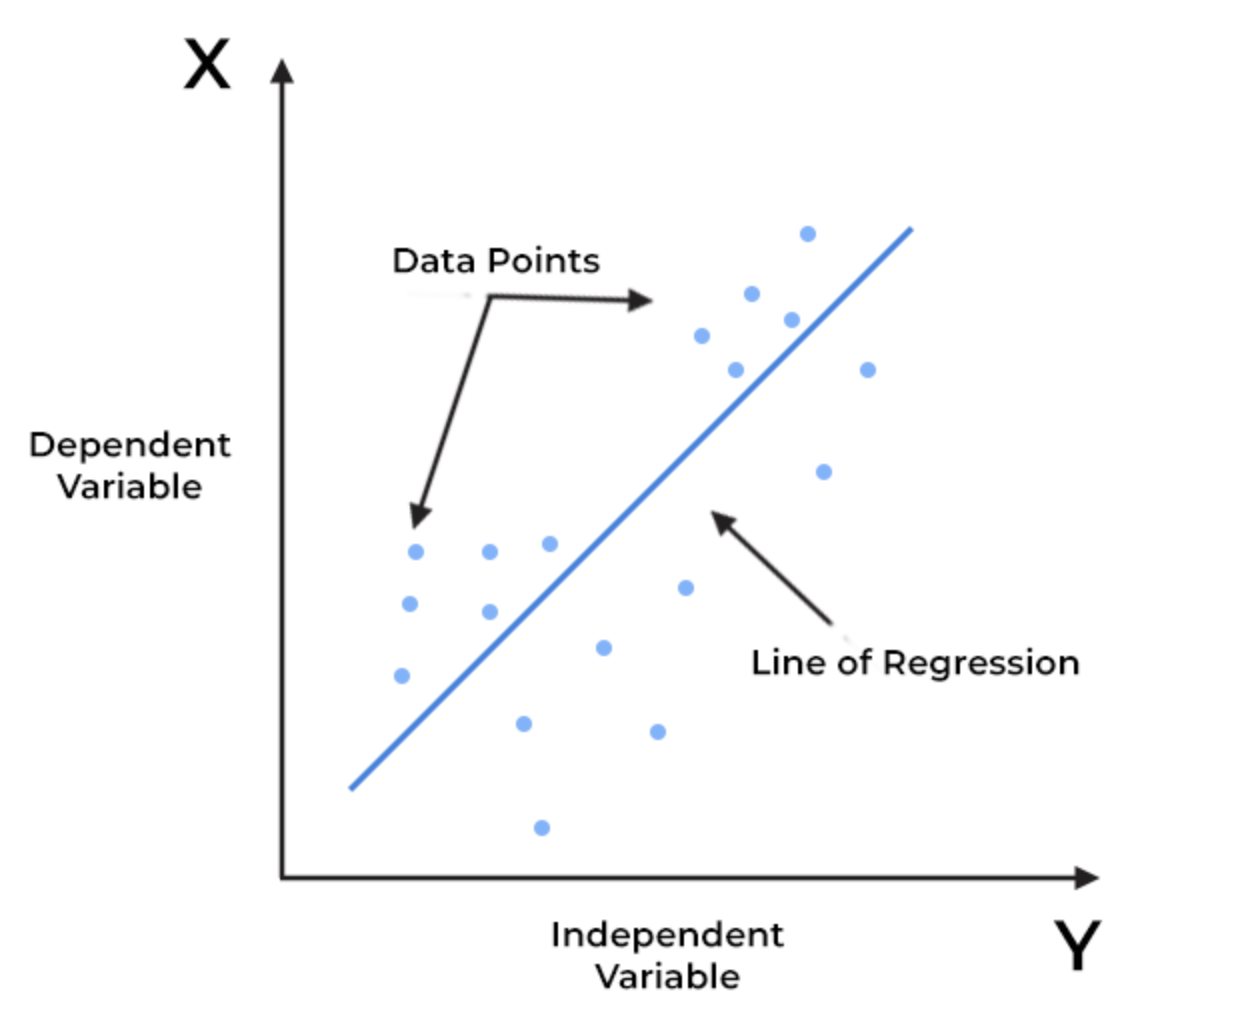

## <font color = 'purple'> **Import the necessary libraries** </font>

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## <font color = 'purple'> **Load the accelerometer data into a pandas DataFrame** </font>

In [143]:
df = pd.read_csv("demo5.csv")

df['possture'].replace(['walk','sits down','from walk to sit','none'],[0,1,2,3],inplace=True)


## <font color = 'purple'> **Extract the input features (accelerometer data) and target (posture)** </font>

In [144]:
X = df.drop("possture", axis=1).values
y = df["possture"].values

## <font color = 'purple'> **Split the data into training and testing sets** </font>

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## <font color = 'purple'> **Train a linear regression model** </font>

In [146]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## <font color = 'purple'> **Make predictions on the test set** </font>

In [147]:
y_pred = reg.predict(X_test)

## <font color = 'purple'> **Evaluate the model's performance** </font>

In [148]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

r2 = r2_score(y_test, y_pred)
print("R^2 Score: {:.2f}".format(r2))


Mean Squared Error: 0.10
R^2 Score: 0.67


## <font color = 'black'> **now we go see with svm model** </font>

In [149]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the accelerometer data into a pandas DataFrame
df = pd.read_csv("demo5.csv")

# Extract the input features (accelerometer data) and target (posture)
X = df.drop("possture", axis=1).values
y = df["possture"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 98.11%


In [150]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [151]:

# Load the labeled accelerometer data from a CSV file
data = pd.read_csv("demo5.csv")

data.drop(['Unnamed: 0', 'katsse', 'akev'], axis=1, inplace=True)
data['possture'].replace(['walk','sits down','from walk to sit','none'],[0,1,2,3],inplace=True)


In [152]:
# Separate the features (accelerometer data) from the labels (posture)
X = data.drop("possture", axis=1)
y = data["possture"]

In [153]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()

In [154]:
# Perform 5-fold cross-validation and compute the mean accuracy for each fold
scores = cross_val_score(dtc, X, y, cv=5)
mean_scores = np.mean(scores,axis=0)

/Users/mendelsellam/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [155]:
# Train the decision tree classifier on all the data
dtc.fit(X, y)

DecisionTreeClassifier()

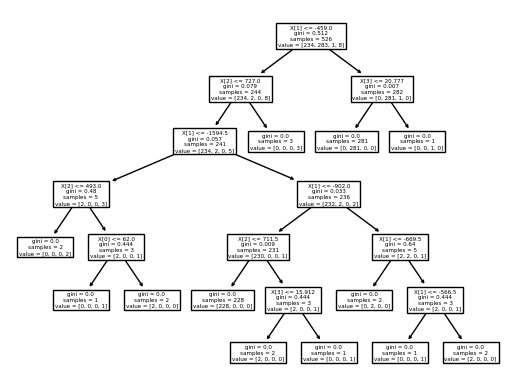

In [156]:
# Plot the decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots()
plot_tree(dtc, ax=ax)
plt.show()


## <font color = 'black'> **see whiche model are the best between (svm,decision tree , knn)l** </font>

In [157]:
 # Chargement des données
df = pd.read_csv('demo5.csv')

# Traitement des données
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1])
y = df.iloc[:, -1]

In [158]:
# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Définition des modèles
dtc = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()

In [159]:
# Apprentissage et évaluation des modèles
models = [dtc, svm, knn]
model_names = ['Decision Tree', 'SVM', 'KNN']
accuracies = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

/Users/mendelsellam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [160]:
# Sélection du meilleur modèle
best_model_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_model_index]
print('Best Model:', best_model_name)

Best Model: Decision Tree


plot the result 

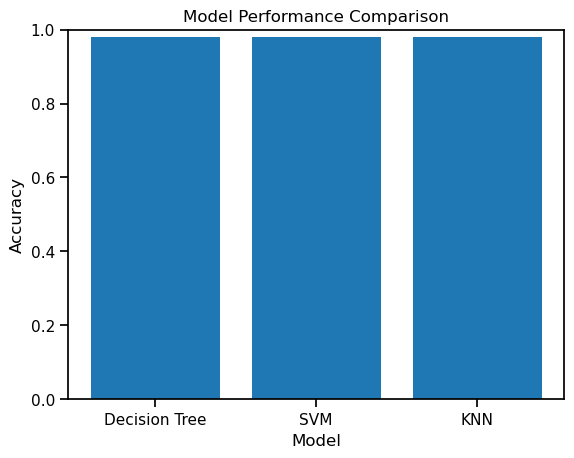

In [161]:
# Tracer un graphique pour visualiser les performances des différents modèles
plt.bar(model_names, accuracies)
plt.ylim([0, 1])
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
